# K Nearest Neighbors
***Méthode des K plus proches voisins***  

Algorithme d'apprentissage supervisé pour la classification.  

Il consiste à projetté les points de notre Dataset sur un plan, repère orthonormé ou pour prédire la classe d'un nouveau point on va lui attribuer la classe du (ou des) point le plus proche.  
Nous pourrons définir comme paramètres le nombre de points *K* à proximité à prendre en compte pour définir la classe.  
On attribuera à la prédiction la classe la plus présente parmi les *K* voisins.

## Générale
Hyper-paramètres :
- *K*, `n_neighbors` : Le nombre de points voisins à prendre en compte (défault 5)
- La mesure de la distance, `metric` : Choix du type de calcule pour la distance entre les points voisins et la prédiction (défault `minkowski`)
- Appliquer des coefficient au calcule de distance.
### Force 
### Faiblesse
### Quand l'utiliser ?

## Run K-NN 
***Le Dataset du Titanic***

- But : Déterminer si un passager va survivre ?
- Métrique :

### Imports

In [22]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.neighbors import KNeighborsClassifier

In [4]:
titanic_DS = sns.load_dataset("titanic")

In [7]:
titanic_DS.shape

(891, 15)

Nous avons :
- 15 variables colonnes 
- 891 exemples lignes 

In [8]:
titanic_DS.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Nettoyage de données...

- Selectionne uniquement les variables qui nous intérresse

In [9]:
titanic = titanic_DS[["survived", "pclass", "sex", "age"]]

- Élimine les ligne avec des valeurs manquantes

In [11]:
titanic.dropna(axis=0, inplace=True)

<ipython-input-11-5e2be2f44d4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.dropna(axis=0, inplace=True)


- Remplace les valeurs Catégorielles par un encodage en valeurs numériques discrètes

In [12]:
titanic["sex"].replace(["male", "female"], [0, 1], inplace=True)

/Users/sylla/Library/Python/3.8/lib/python/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [36]:
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


### Entrainement
Nous allons pouvoir utliser les 3 méthodes suivante pour entrainer, mesurer et faire marcher notre modèle  
- **`.fit(X,y)`** : Entrainer
- **`.score(X,y)`** : Mesurer la performance
- **`.predict(X,)`** : Faire marcher le modèle

- nous devons séparer notre *y* notre vecteur de données à prédire de notre matrice *X* nos variables

In [14]:
y = titanic["survived"]
X = titanic.drop("survived", axis=1)

In [15]:
X.shape, y.shape

((714, 3), (714,))

#### modèle

In [16]:
model = KNeighborsClassifier()

In [56]:
model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [57]:
model.score(X, y)

0.8319327731092437

- Après un premier Run de notre modèle :  
Nous avons une précicion de 83%, il prédit 83% du temps la bonne réponse si le passager survit.

In [61]:
model.predict(X)[1]

1

## Test du modèle

Nous allons créer une fonction affin de passer des paramètres au modèle pour le tester

In [63]:
X.columns

Index(['pclass', 'sex', 'age'], dtype='object')

In [104]:
def pred_person_survie(model, pclass=2, sex=0, age=34):
    
    x = np.array([pclass, sex, age]).reshape(1, 3) # reshape donne les bonne dim
    
    print(model.predict(x)) # pred si la personne à survecue avec ses param
    print(model.predict_proba(x)) # proba de cette prediction
     
    

In [105]:
pred_person_survie(model)

[0]
[[1. 0.]]


- On voit que je n'aurais pas survécue et que j'avais 100% de chance de mourir 

# Méthode avancé 
Entrainement d'un modèle KNN avec les bonnes pratique 

In [49]:
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


## Train Test Split 
Séparation du dataset en donnée de test et d'entrainement 

In [23]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [51]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((571, 3), (143, 3), (571,), (143,))

Text(0.5, 1.0, 'test set')

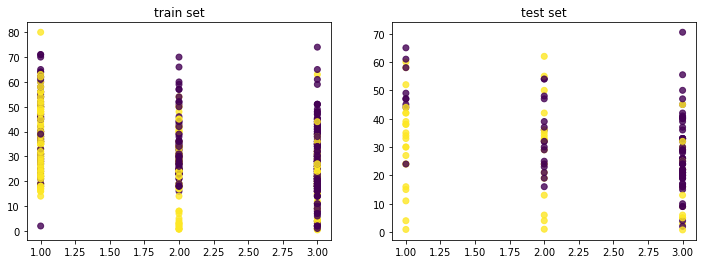

In [58]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 2], c=y_train, alpha=0.8)
plt.title('train set')

plt.subplot(122)
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 2], c=y_test, alpha=0.8)
plt.title("test set")


### Premier entrainement

Premier entrainement rapide avec KNN sans travail sur données, il nous servira de base 

In [60]:
model = KNeighborsClassifier(n_neighbors=4)

In [62]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [64]:
model.score(x_test, y_test)

0.7972027972027972

- score *r2* de 79%, base pour le début de notre travail

## Cross-Validation 
Entrainer et valider le modèle sur plusieurs découpe possible du Train set et Validation set, le score en sortit sera une moyenne des résultats obtenue de ces différents entrainements

In [65]:
from sklearn.model_selection import cross_val_score

In [78]:
cross_val_score(KNeighborsClassifier(4), x_train, y_train, cv=5, scoring='accuracy').mean()

0.7460564454614798

On obtient par exemple 74% de moyenne avec 4 voisins et un découpage en 5 partie du dataset

### Recherche du meilleur hyper parametres

Testons les différentes possiblité pour le paramètres de n_voisins, pour visualiser sur un graphique le meilleur score.

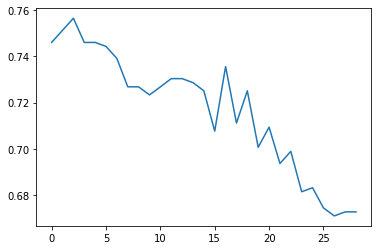

In [80]:
val_score = [] # liste poiur stocker les resultats

for k in range(1, 30):
    score = cross_val_score(KNeighborsClassifier(k), x_train, y_train, cv=5).mean()
    val_score.append(score)
    
plt.plot(val_score)

On observe qu'on obtient potentiellment les meilleurs score avec 3 voisins

#### Validation Curve
Même chose que ci-dessus la validation curve est implémenté dans Sklearn

In [82]:
from sklearn.model_selection import validation_curve

In [87]:
# Nombre de n_voisinsà tester
k = np.arange(1, 30)

In [88]:
train_score, val_score = validation_curve(model, x_train, y_train, 'n_neighbors', k, cv=5)

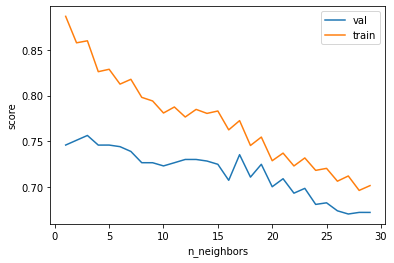

In [93]:
plt.plot(k, val_score.mean(axis=1), label='val')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

## Grid Search CV

Recherche avancé des tous les meilleurs parametres pour un modele

In [94]:
from sklearn.model_selection import GridSearchCV

- Créer un dict qui contient les différent parametre avec les valeurs a tester

In [95]:
param_grid = {'n_neighbors': np.arange(1, 30), 
             'metric': ['euclidean', 'manhattan']}

- On passe la modele et le dict de param a la grille de recherhce

In [96]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

- On lance l'entrainement de la grille avec le modele et tout les param a tester

In [97]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

- Le modele qui a eu le meilleur Score

In [98]:
grid.best_score_

0.7618611746758199

- Ses meilleur parametres

In [99]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 6}

### Test du modèle

- On sauvegarde le meilleur modele avec 

In [100]:
model_grid_best = grid.best_estimator_

- On le test sur le test set

In [102]:
model_grid_best.score(x_test, y_test)

0.7972027972027972

## Analyse des resultats

**Matrice de confusion**

In [103]:
from sklearn.metrics import confusion_matrix

In [104]:
confusion_matrix(y_test, model_grid_best.predict(x_test))

array([[81,  6],
       [23, 33]])

### Courbe d'apprentissage

Notre modele serait il meilleur avec plus de données??